This notebook provides an example of taking a focus sequence on a particular target.  It includes every step, from slewing to the target to adjusting the focus position.  
Displaying the focus fit is handled by a separate ipython notebook, MeasureFocus.ipynb, so that the two can be run side by side. 
Written: 02/18/2020 by Sasha Brownsberger
Modified: 
02/19/2020 by Sasha Brownsberger

In [ ]:
#Do the basic imports for general AuxTel operations
import asyncio
from lsst.ts import salobj
from lsst.ts.standardscripts.auxtel.attcs import ATTCS
from lsst.ts.standardscripts.auxtel.latiss import LATISS

#And the imports needed specifically for focusing
#import numpy as np 
import matplotlib.pyplot as plt 
import time 
import numpy as np 
import math 
import scipy.optimize as optimize
%matplotlib inline 

#And additional start up script
domain = salobj.Domain()
attcs = ATTCS(domain)
latiss = LATISS(domain)
await asyncio.gather(attcs.start_task, latiss.start_task)

##You must run the below lines only if you have not yet enabled the system (if you have taken biases, flats, etc, this should already be done)##

(There is no harm in running it repeatedly, however) 

In [2]:
#And enable the system:
await attcs.enable()
await latiss.enable()

In [3]:
##End enable scripts.##  

This is a generally useful function for cleanly rounding numbers for display purposes.

In [4]:
def round_to_n (num_to_round, n_sig_figs):
    if num_to_round == 0.0:
        return num_to_round
    rounded_num = round(num_to_round, -int(math.floor(math.log10(abs(num_to_round)))) + (n_sig_figs - 1))
    if int(rounded_num) == rounded_num:
        rounded_num = int(rounded_num)
    return rounded_num

Slew to to the field of interest.  

Note that by having the slewing go to a particular RA/Dec position, we can specify the target_name as being a focus.  

In [5]:
#target_name = "HD 84937"
#await attcs.slew_icrs(ra="09 19 47.94", dec" -34 06 11.9", rot_pa=88.,target_name=target_name, slew_timeout=240.)
# OR
#await attcs.slew_object(name = target_name,  rot_sky=0.0, slew_timeout=240.)

In [6]:
#Focus units are given in mm 
focus_center = -0.2155
focus_step = 0.02
n_steps = 9
focus_positions = np.linspace(focus_center - focus_step * math.floor(n_steps / 2), focus_center + focus_step * math.ceil(n_steps / 2 - 1), n_steps)
#focus_positions = [0.05, -0.05, -0.100, -0.150, -0.200, -0.250, -0.300, -0.3, -0.2, -0.2, -0.24, -0.26, -0.28]
print ('focus_positions = ' + str(focus_positions))

focus_positions = [-0.2955 -0.2755 -0.2555 -0.2355 -0.2155 -0.1955 -0.1755 -0.1555 -0.1355]


RemoteEvent(ATHeaderService, 0, logMessage) falling behind; read 10 messages
RemoteEvent(ATHeaderService, 0, logMessage) falling behind; read 10 messages
RemoteEvent(ATHeaderService, 0, logMessage) falling behind; read 14 messages
RemoteEvent(ATHeaderService, 0, logMessage) falling behind; read 12 messages
RemoteEvent(ATHeaderService, 0, logMessage) falling behind; read 10 messages
RemoteEvent(ATHeaderService, 0, logMessage) falling behind; read 11 messages
RemoteEvent(ATHeaderService, 0, logMessage) falling behind; read 13 messages
RemoteEvent(ATHeaderService, 0, logMessage) falling behind; read 11 messages
RemoteEvent(ATHeaderService, 0, logMessage) falling behind; read 10 messages
RemoteEvent(ATHeaderService, 0, logMessage) falling behind; read 12 messages
RemoteEvent(ATHeaderService, 0, logMessage) falling behind; read 11 messages
RemoteEvent(ATHeaderService, 0, logMessage) falling behind; read 11 messages
RemoteEvent(ATHeaderService, 0, logMessage) falling behind; read 10 messages

User should specify the observing parameters that they want, including: 
filter, grating, exposure time, ...

In [ ]:
exp_time = 5.0 
filter_str = 'empty_1'
grating_str = 'ronchi90lpmm'

And now we can loop through the specified focus values: 

In [30]:
#!!!!DO NOT RUN UNLESS YOU HAVE BEEN CLEARED TO CONTROL TELESCOPE!!!!! 
focus_images = [0 for focus_pos in focus_positions]
for i in range(len(focus_positions)): 
    focus_pos = focus_positions[i] 
    print ('Working on focus position ' + str(focus_pos))
    await attcs.focus_offset(focus_pos)
    non_dispersed_focus_image = await latiss.take_engtest(exptime=2., n=1, filter='empty_1', grating='ronchi90lpmm') 
    print ('Newest image id is = ' + str(non_dispersed_focus_image ) )
    non_dispersed_focus_images[i] = int(non_dispersed_focus_image )
    
#This resets the focus position after taking this sequence: 
await attcs.ataos.cmd_applyFocusOffset.set_start(offset = focus_center)
 

Working on focus position -0.2955


RemoteEvent(ATHeaderService, 0, logMessage) falling behind; read 12 messages


Newest image id is = [2020021800220]
Working on focus position -0.27549999999999997


RemoteEvent(ATHeaderService, 0, logMessage) falling behind; read 10 messages


Newest image id is = [2020021800221]
Working on focus position -0.2555
Newest image id is = [2020021800222]
Working on focus position -0.2355
Newest image id is = [2020021800223]
Working on focus position -0.2155
Newest image id is = [2020021800224]
Working on focus position -0.1955
Newest image id is = [2020021800225]
Working on focus position -0.1755
Newest image id is = [2020021800226]
Working on focus position -0.1555
Newest image id is = [2020021800227]
Working on focus position -0.1355
Newest image id is = [2020021800228]


In [27]:
#TEMPORARY CELL
#offset in x and y to move a spectrum off an amp division (vals are in arcseconds)
#Do we offset the telescope or the boresight? 
#offset_xy will move the obj
#await attcs.offset_xy(x= 55, y= -106)


In [28]:
#TEMPORARY CELL
#await latiss.take_engtest(exptime=2., n=1, filter='empty_3', grating='empty_1') 

RemoteEvent(ATHeaderService, 0, logMessage) falling behind; read 11 messages


array([2020021800219])

In [9]:
#!!!!DO NOT RUN UNLESS YOU HAVE BEEN CLEARED TO CONTROL TELESCOPE!!!!! 
science_images = [0 for focus_pos in focus_positions]
for i in range(len(focus_positions)): 
    focus_pos = focus_positions[i] 
    print ('Working on focus position ' + str(focus_pos))
    attcs.athexapod.evt_positionUpdate.flush() 
    await attcs.ataos.cmd_applyFocusOffset.set_start(offset=focus_pos)
    await attcs.athexapod.evt_positionUpdate.next(flush=False, timeout=attcs.long_timeout)
    science_image = await latiss.take_engtest(exptime=5., n=1, filter='empty_3', grating='ronchi90lpmm') 
    print ('Newest image id is = ' +str(science_image) )
    science_images[i] = int(science_image)
#This should reset the focus position after taking this sequence: 
await attcs.ataos.cmd_applyFocusOffset.set_start(offset = focus_center)
#science_images = [2020021700221, 2020021700222, 2020021700223, 2020021700224,2020021700225, 2020021700226, 2020021700227, 2020021700228,2020021700229, 2020021700230, 2020021700231] 

Working on focus position -0.2955
Newest image id is = [2020021800236]
Working on focus position -0.27549999999999997


RemoteEvent(ATHeaderService, 0, logMessage) falling behind; read 12 messages


Newest image id is = [2020021800237]
Working on focus position -0.2555
Newest image id is = [2020021800238]
Working on focus position -0.2355
Newest image id is = [2020021800239]
Working on focus position -0.2155


RemoteEvent(ATHeaderService, 0, logMessage) falling behind; read 10 messages


Newest image id is = [2020021800240]
Working on focus position -0.1955
Newest image id is = [2020021800241]
Working on focus position -0.1755
Newest image id is = [2020021800242]
Working on focus position -0.1555
Newest image id is = [2020021800243]
Working on focus position -0.1355
Newest image id is = [2020021800244]


In [5]:
science_images = [2020021800263, 2020021800264, 2020021800265, 2020021800266, 2020021800267, 2020021800268, 2020021800269, 2020021800270, 2020021800271]

User MUST specify the date_str below.  They can also optionally change: 

(1) The spectrum offsets (distance in rows from star to point in spectrum) 
(2) The size of the box in columns that we slice to do the fitting. 
(3) The binning, in rows
(4) If we are going to apply a bias correction to the data (faster without, no amp offset problems with) 

In [7]:
date_str ="2020-02-18"
spectrum_offsets = [882, 1170, 1467]
spectrum_fit_col_edges = [-50, 50]
binning = 20
apply_bias = 1

The second is a focus along the spectrum of a star.  This is a somewhat subtler problem, and we below provide code to fit a guassian along the cross section of a star.  This assumes that the best fit gaussian in each row does in fact belong to the target object.  User should specify a column range to isolate the target star (

This script is run on the loaded data, and should wait until after all objects in the focus run are read out.  

In [12]:
#General imports and setups for managing 
import os
import lsst.daf.persistence as dafPersist
import lsst.afw.image as afwImage


from lsst.ip.isr.isrTask import IsrTask

isrConfig = IsrTask.ConfigClass()
isrConfig.doLinearize = False
isrConfig.doBias = (True if apply_bias else False)
isrConfig.doFlat = False
isrConfig.doDark = False
isrConfig.doFringe = False
isrConfig.doDefect = False
isrConfig.doAddDistortionModel = False
isrConfig.doWrite = False
isrTask = IsrTask(config=isrConfig)

butler = dafPersist.Butler("/mnt/dmcs/oods_butler_repo/repo")

/opt/lsst/software/stack/python/miniconda3-4.7.10/envs/lsst-scipipe-4d7b902/lib/python3.7/site-packages/ipykernel_launcher.py:16: FutureWarning: Config field doAddDistortionModel is deprecated: Camera geometry is incorporated when reading the raw files. This option no longer is used, and will be removed after v19.
  app.launch_new_instance()
RemoteTelemetry(ATPtg, 0, mountStatus) falling behind; read 10 messages
RemoteTelemetry(ATPtg, 0, guidingAndOffsets) falling behind; read 10 messages


In [2]:
#Measure centroids 
#If you get some version of the error: 
#     ModuleNotFoundError: No module named 'lsst.atmospec'
# that probably means you are working off of the Python3 kernel, rather than the local kernel.  
#We found this would happen when the kernel crashed and had to be restarted.
#This problem can be easily fixed by clicking on the "Python 3" in the upper right of your jupyter notebook window.  


from lsst.atmospec.processStar import ProcessStarTask
config = ProcessStarTask.ConfigClass()
config.mainSourceFindingMethod = 'BRIGHTEST'
task = ProcessStarTask(config=config)

In [3]:
#To each row of the sliced arrays, fit a Gaussian and record the parameters. 
# It would be nice to have a graphical display update, but that could take a long time... 

In [6]:
binning = 20
all_sub_arrays = [[] for science_image in science_images]
image_arrays = [[] for science_image in science_images] 
centroids = [[] for science_image in science_images]
for i in range(len(science_images)):
    science_image = science_images[i] 
    print ('Reading in spectrum from science_image ' + str(science_image))
    seq_str = int(str(science_image)[9:]) #Truncate the leading date string, and lose extra 0s
    dataId = dict(dayObs=date_str)
    dataId["seqNum"] = seq_str
    if apply_bias: 
        try:
            bias
        except NameError:
            bias = butler.get('bias', dataId)
        exp = butler.get('raw', dataId)
        exp = isrTask.run(exp, bias = bias).exposure
    else: 
        try:
            bias
        except NameError:
            bias = butler.get('bias', dataId)
        exp = butler.get('raw', dataId)
        exp = isrTask.run(exp).exposure
    array = np.transpose(exp.image.array) 
    image_arrays[i] = array
    centroid = task.findMainSource(exp)
    centroids[i] = [int(centroid[0]), int(centroid[1])] 
    centroid = centroids[i] 
    sub_arrays = [array[centroid[0] + spectrum_fit_col_edges[0]:centroid[0] + spectrum_fit_col_edges[1], centroid[1] + spectrum_offsets[j]:centroid[1] + spectrum_offsets[j] + binning] for j in range(len(spectrum_offsets))]
    all_sub_arrays[i] = sub_arrays
    
print ('centroids = ' + str(centroids))

Reading in spectrum from science_image 2020021800263


NameError: name 'date_str' is not defined

In [15]:
#These are hard-coded parameters for the fitting and plotting that the user might consider changing
lower_fraction_to_measure_floor = 0.1
seeing_guess_in_arcmin = 1.0
arcmin_to_pixel = 1.0 / 0.1
display_frac = 0.1 
n_free_fit_params = 3
fitting_funct = lambda xs, A, mu, sig, shift: A * np.exp(-(xs - mu) ** 2.0 / (2.0 * sig ** 2.0) ) + shift

Fitting sub array  0
Fitting sub array  1
Fitting sub array  2
Fitting sub array  3
Fitting sub array  4
Fitting sub array  5
Fitting sub array  6
Fitting sub array  7
Fitting sub array  8


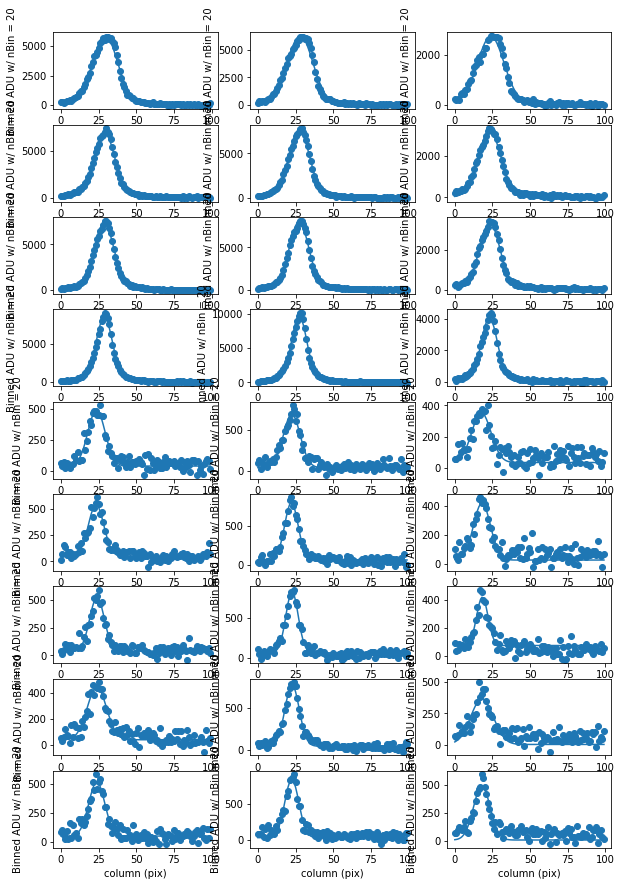

fits = [[[5808.041569041016, 29.369759526475015, 8.35774174998278, 0], [6191.35989632682, 28.027175967037273, 8.577491960632768, 0], [2694.693188510472, 23.879765033426565, 8.78810714512724, 0]], [[6923.829773506016, 28.79537484555188, 6.92308305105082, 0], [7546.349086031309, 27.445436454072723, 6.922558789220444, 0], [3204.7822436399656, 23.089429071769967, 7.5026121150211065, 0]], [[7247.896520825816, 28.6792560635418, 6.6126467914033515, 0], [7937.420772488257, 27.3250992576675, 6.556999681726949, 0], [3339.7613087343175, 23.138776440803547, 6.801604543797725, 0]], [[8439.61718645722, 28.78104187274775, 5.502105253612821, 0], [9567.925125131978, 27.422674922983294, 5.207308834386229, 0], [3998.6682978579156, 22.930790394841836, 5.450335013063208, 0]], [[452.1247237171208, 23.605379976219364, 5.700580318926166, 0], [650.9204642820968, 22.509595559991673, 5.618613683275501, 0], [319.06034445626267, 17.612670321621696, 6.403092244503446, 0]], [[494.902614721181, 23.319898250473873, 5.

2020-02-19 06:54:39  ATMCS      _read_loop           WARNING RemoteEvent(ATMCS, 0, target) falling behind; read 64 messages
2020-02-19 06:54:39  ATDomeTrajectory _read_loop           WARNING RemoteEvent(ATDomeTrajectory, 0, logMessage) falling behind; read 65 messages
2020-02-19 06:54:39  ATPtg      _read_loop           WARNING RemoteTelemetry(ATPtg, 0, timeAndDate) falling behind; read 17 messages
2020-02-19 06:54:39  ATDome     _read_loop           WARNING RemoteTelemetry(ATDome, 0, position) falling behind; read 16 messages
2020-02-19 06:54:40  ATPtg      _read_loop           WARNING RemoteTelemetry(ATPtg, 0, mountStatus) falling behind; read 17 messages
2020-02-19 06:54:40  ATPtg      _read_loop           WARNING RemoteTelemetry(ATPtg, 0, guidingAndOffsets) falling behind; read 17 messages
2020-02-19 06:54:40  ATPtg      _read_loop           WARNING RemoteTelemetry(ATPtg, 0, currentTargetStatus) falling behind; read 18 messages


In [18]:
#Do the fits to the seeing 
fits = [[[] for spectrum_offset in spectrum_offsets] for science_image in science_images]

f, axarr = plt.subplots(len(all_sub_arrays), len(spectrum_offsets), figsize = [10,15])
for i in range(len(all_sub_arrays)):
    centroid = centroids[i] 
    sub_arrays = all_sub_arrays[i]
    print ('Fitting sub array  ' + str(i)) 
    for j in range(len(spectrum_offsets)): 
        sub_array = sub_arrays[j]
        row = np.sum(sub_array, axis = 1) 
        xs = range(len(row))
        max_col = np.argmax(row)
        sorted_row = sorted(row)
        floor_estimate = np.mean(sorted_row[0:int(len(sorted_row) * lower_fraction_to_measure_floor)])
        bias_sub_row = np.array(row) - floor_estimate 
        init_guess = [row[max_col], max_col, arcmin_to_pixel * seeing_guess_in_arcmin / np.log(np.sqrt(2.0))]
        try:
            best_fit =  optimize.curve_fit(lambda xs, A, mu, sig: fitting_funct(xs, A, mu, sig, floor_estimate), xs, bias_sub_row, p0=init_guess, maxfev = 10000) 
            fit_params = list(best_fit[0]) + [0] 
        except RuntimeError:
            print ('Failed to fit bin ' + str(bin) + '.  Returning initial best guess fit.')
            fit_params = init_guess + [1]
        fits[i][j] = fit_params
        axarr[i,j].scatter(xs, bias_sub_row)
        axarr[i,j].plot(xs, fitting_funct(xs, *fit_params[0:-1], floor_estimate))
        axarr[i,j].set_xlabel('column (pix)')
        axarr[i,j].set_ylabel('Binned ADU w/ nBin = ' + str(binning))
        
plt.show( )
print ('fits = ' + str(fits))

For 0th offset, fitted minimium = -0.185mm
For 1th offset, fitted minimium = -0.172mm
For 2th offset, fitted minimium = -0.184mm


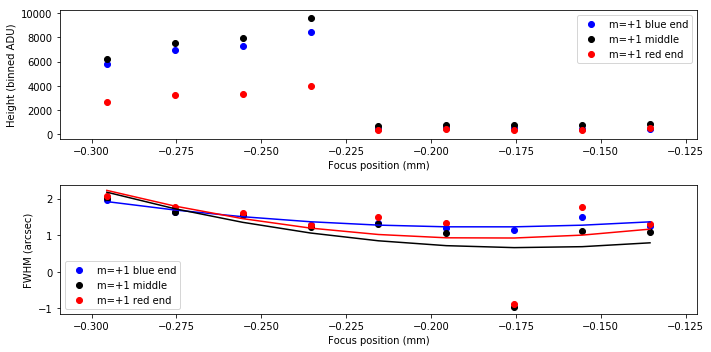

2020-02-19 06:55:12  ATMCS      _read_loop           WARNING RemoteEvent(ATMCS, 0, target) falling behind; read 10 messages
2020-02-19 06:55:12  ATDomeTrajectory _read_loop           WARNING RemoteEvent(ATDomeTrajectory, 0, logMessage) falling behind; read 10 messages


In [21]:
#Now we want to make plots of fit vs focus
#We will plot this
sigma_to_fwhm = 2.35
sec_heights = [[0.0 for pos in focus_positions] for spec_sec in spectrum_offsets]
sec_widths = [[0.0 for pos in focus_positions] for spec_sec in spectrum_offsets]
sec_centers = [[0.0 for pos in focus_positions] for spec_sec in spectrum_offsets]
for fit_num in range(len(fits)):
    single_obj_fit = fits[fit_num]
    for offset_num in range(len(spectrum_offsets)): 
        fit = single_obj_fit[offset_num]
        sec_heights[offset_num][fit_num] = fit[0] 
        sec_widths[offset_num][fit_num] = fit[2] 
        sec_centers[offset_num][fit_num] = fit[1] 
#print ('sec_heights = ' + str(sec_heights ))
#print ('sec_widths = ' + str(sec_widths ))
#print ('sec_centers = ' + str(sec_centers ))

#Now we want to fit the widths of each spectrum section 
quadratic_fits_of_widths = [[] for offset in spectrum_offsets]
for offset_num in range(len(spectrum_offsets)):
    single_sec_widths = sec_widths[offset_num]
    quadratic_fit = np.polyfit(focus_positions, single_sec_widths, 2)
    quadratic_fits_of_widths[offset_num] = quadratic_fit
    fit_min = -quadratic_fit[1] / (2.0 * quadratic_fit[0])
    print ('For ' + str(offset_num) + 'th offset, fitted minimium = ' + str(round_to_n(fit_min, 3)) + 'mm')
    
#Now plot the fits and the seeing data points 
f, axarr = plt.subplots(n_free_fit_params-1,1, figsize = [10, 5])
colors = ['b', 'o', 'r']
xlabels = ['Focus position (mm)', 'Focus position (mm)']
ylabels = ['Height (binned ADU)', 'FWHM (arcsec)']
param_strs = ['Height (binned ADU)', 'Center (col)', 'Sigma width (pix)']
param_legends = ['m=+1 blue end', 'm=+1 middle', 'm=+1 red end']
scats_for_legend = [0.0 for offset in spectrum_offsets]
for offset_num in range(len(spectrum_offsets)): 
    scats_for_legend[offset_num] = axarr[0].scatter(focus_positions, sec_heights[offset_num], c = colors[offset_num])
    axarr[0].set_xlabel(xlabels[0])
    axarr[0].set_ylabel(ylabels[0])
    axarr[0]
    #axarr[1].scatter(focus_positions, sec_centers[offset_num], c = colors[offset_num])
    axarr[1].scatter(focus_positions, [center * 1.0 / arcmin_to_pixel * sigma_to_fwhm for center in sec_widths[offset_num] ] , c = colors[offset_num])
    axarr[1].plot(focus_positions, np.poly1d(quadratic_fits_of_widths[offset_num])(focus_positions) * 1.0 / arcmin_to_pixel * sigma_to_fwhm, c = colors[offset_num])
    axarr[1].set_xlabel(xlabels[1])
    axarr[1].set_ylabel(ylabels[1]) 
axarr[0].legend(scats_for_legend, param_legends )
axarr[1].legend(scats_for_legend, param_legends )
plt.tight_layout( )
plt.show() 